In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL.ImageColor import colormap
from sqlalchemy import false

sns.set_palette("bright")

In [289]:
data = pd.read_csv("data_sets/forestfires.csv")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


 В данных отсутствуют пропуски.

In [291]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Первичный анализ данных

Количество записей в датасете - 517.

Среднее значение числовых величин представлено в строке "mean". Оно показывает усредненное значение для соответствующих величин.

Значение среднего стандартного отклонения представлено в строке "std". Оно показывает величину отклонения от среднего значения.

Строки "min" и "max" содержат минимальные и максимальные значения соответственно для числовых величин.

Строки "25%", "75%" содержат значения квартили первого и третьего порядков.

Строка "50%" содержат значения медианы - квартиля второго порядка.

`X`

Среднее значение - примерно 4.6.

`Y`

Среднее значение - примерно 4.2.


`FFMC` - измеряет влажность поверхностных, быстросохнущих горючих материалов (хвоя, листья, трава)

Среднее значение - 90.6.

Медианное значение - 91.6.

Высокие значения говорят о большом преобладании сухих условий. Это может способствовать пожарам.

`DMC` - индекс влажности верхних слоев почвы

Среднее значение - 110

Медианное значение - 108.

Высокие значение показателя DMC также говорят о преобладании в основном сухих условий в местности.


`DC` - индекс влажности почвы

Среднее значение - 547.

Медианное значение - 664.

Максимальное значение - 860.

`ISI` - индекс скорости распространения огня сразу после воспламенения

Среднее значение - 9, стандартное отклонение - 4.

Медианное значение - 8.

Индекс скорости воспламенения принимает высокие значения. Это говорит о том, что в случае возгорания огонь может быстро распространиться по поверхности.

`temp`

Среднее значение - 18, медианное значение - 19.

Нет большого разброса температур, преобладает теплый климат.

`RH`

Среднее значения - 44, среднее отклонение - 17.

Минимальное и максимальное значения - 15 и 100.

Большой размах значений говорит о том, что возможны выбросы или аномальные ситуации. Низкие значения RH могут привести к быстрому высыханию и последующему возгоранию, а высокие, наоборот, могут уменьшить вероятность возникновения пожара.

`wind`

Среднее значение - 4, отклонение - 1.79.

Минимальное и максимальное значения - 0.4 и 9.4.

Большой размах значений говорит о том, что возможны выбросы или аномальные ситуации. В основном ветер принимает умеренные значения из-за небольшого значения отклонения, но может возникнуть аномальная ситуация с высокой скоростью (9.4), которая может способствовать возгоранию.

`rain`

Среднее значение - 0.02.

Стандартное отклонение - 0.29.

Минимальное и максимальное значения - 0 и 6.4.

Большой размах значений говорит о том, что возможны выбросы или аномальные ситуации. Преобладают дни с низким количеством дождевых осадков, что говорит о том, что пожары были зафиксированы в сухую погоду.

`area`

Среднее значение - 12

Медианное значение - 0.5.

Большой размах значений говорит о том, что возможны выбросы или аномальные ситуации. Возможно, что произошло много мелких пожаров, которые были быстро ликвидированы, а больших пожаров было гораздо меньше.


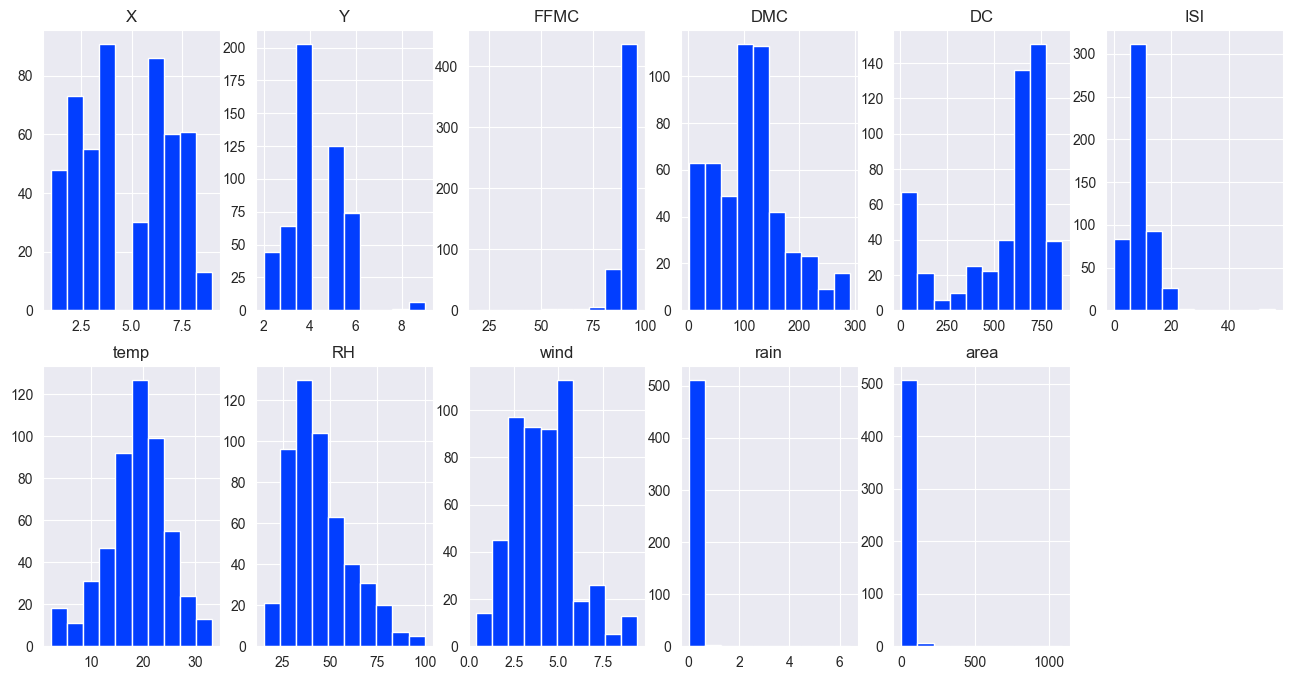

In [292]:
numeric_columns = data.select_dtypes(include=['number'])
fig, axs = plt.subplots(2, 6, figsize=(16, 8))
ax_flat = axs.flatten()
for i, col_name in enumerate(numeric_columns):
    ax_flat[i].hist(data[col_name])
    ax_flat[i].set_title(col_name)
ax_flat[i+1].set_visible(False)

### Интерпретация графиков

Гистограммы для `rain` и `area` тяжело прочесть из-за наличия выбросов.

Большая часть значений индекса `DMC` лежит в диапазоне от 100 до 150.
Большая часть значений индекс `DC` лежит в диапазоне от 600 до 800.

Так как оба этих признака характеризуют засушливость почты, то можно сделать вывод о том, что пожары возникают в особенно засушливых областях парка.

Большая часть значений температуры лежит в диапазоне от 25 до 30 - пожары возникали в теплые или жаркие дни.

Гистограмма коэффициента влажности смещена влево и значения `RH` в основном лежат в диапазоне от 20 до 60 - это говорит о том, что в основном пожары возникали в неувлажненных областях.

Значения коэффициента `wind` лежат в диапазоне от 2 до 8 - пожары возникали в дни с сильным ветром.


<Axes: xlabel='X', ylabel='Y'>

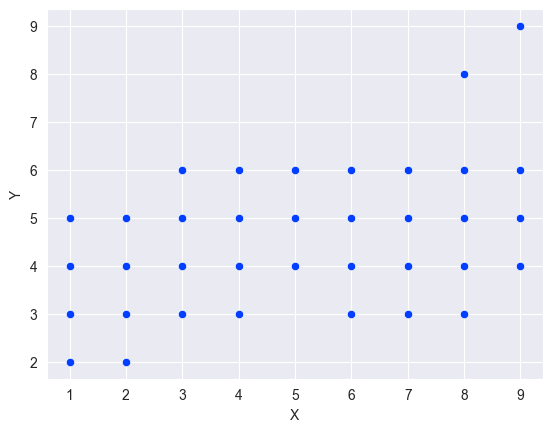

In [293]:
sns.scatterplot(data, x="X", y="Y")


Пожары возникали не по всей территории парка. Возможно, в парке есть зоны, лучше защищенные от появления пожаров, или водоемы.


<Axes: xlabel='area', ylabel='Density'>

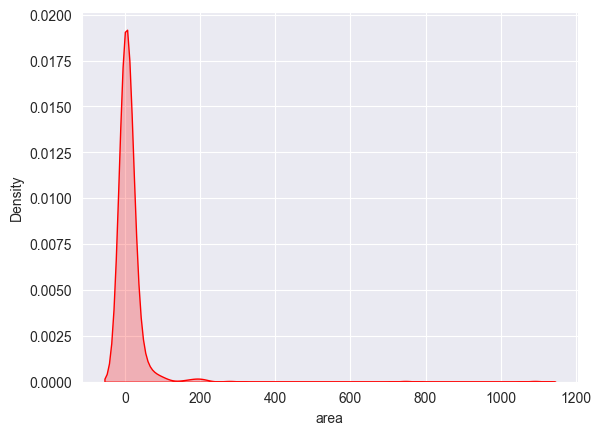

In [294]:
sns.kdeplot(data, x="area", fill=True, color="red")

Так как пик графика лежит в окрестности нуля по оси area, то можно сказать, что большая часть пожаров либо была быстро ликвидирована, либо они распространились на небольшую площадь. В то же время есть небольшое количество пожаров, распространившихся на большую площадь.

<Axes: xlabel='temp', ylabel='FFMC'>

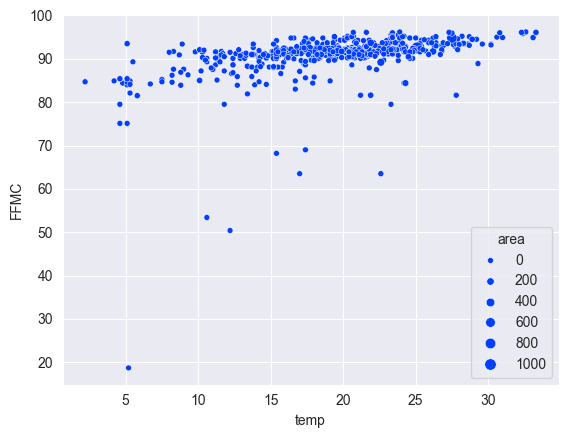

In [295]:
sns.scatterplot(data, x="temp", y="FFMC", size="area")

С ростом температура росла степень засушливости почвы. Более крупные пожары приходились на дни с более жаркой погодой.

<Axes: xlabel='RH', ylabel='temp'>

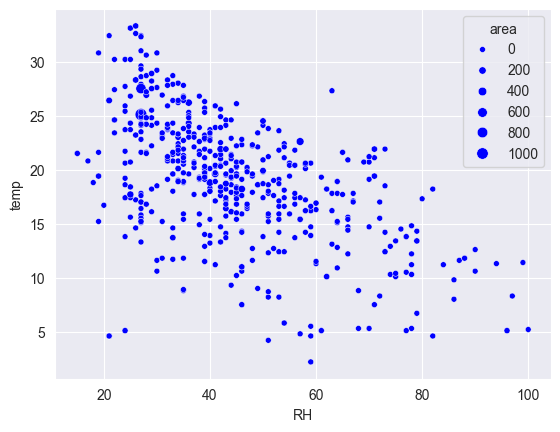

In [296]:
sns.scatterplot(data, x="RH", y="temp", color="blue", size="area")

Показатели влажности принимают более высокие значения при более низкой температуре. Сильные пожары происходят при низком уровне влажности и высокой температуре. При высоком уровне влажности и низкой температуре пожары редки, а возникшие пожары не распространяются на большую площадь.

<Axes: xlabel='ISI', ylabel='temp'>

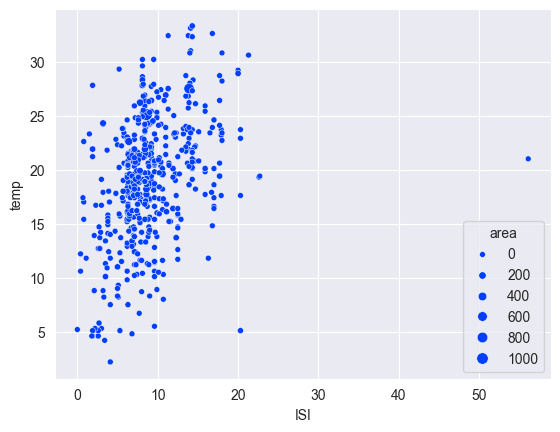

In [297]:
sns.scatterplot(data, x="ISI", y="temp", size="area")

Более высоким значениям скорости воспламенения соответствуют более высокие показатели температуры, значит, при жаркой погоде скорость воспламенения может вырасти.

Крупные пожары были зафиксированы при высоких показателях `ISI` и `temp`.

<Axes: >

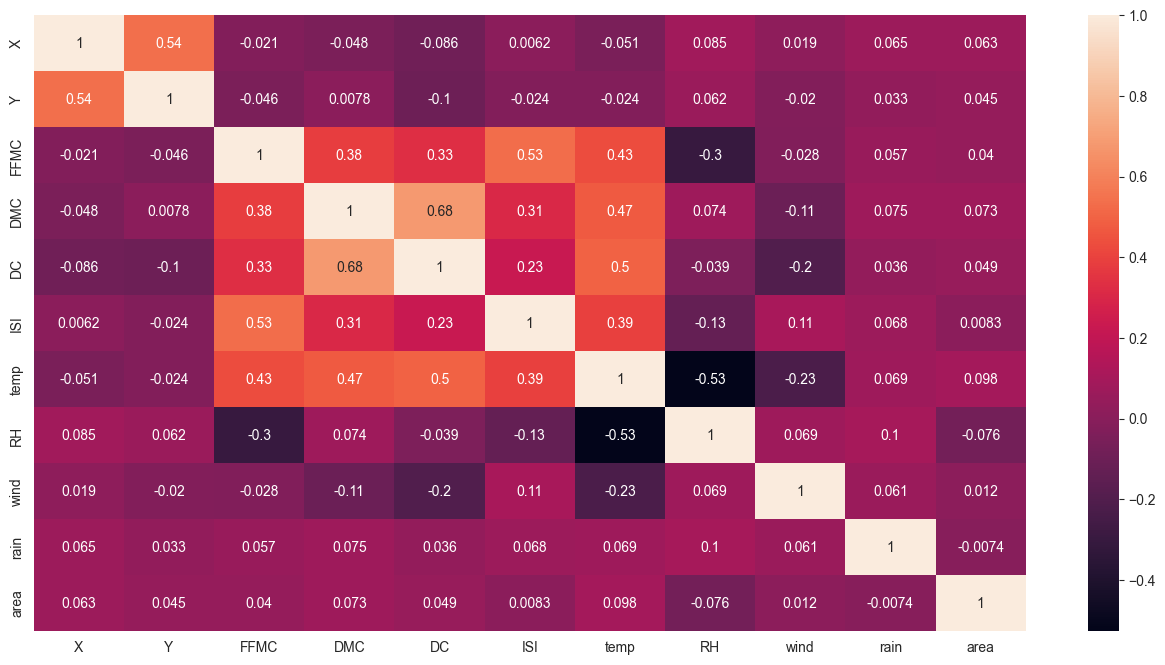

In [298]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, square=False)

### Интерпретация

Степень корреляции `X` и `Y` сотавляет 0.54. Формально они умеренно коррелируют, но в то же время нет логической интерпретации для зависимости координат друг от друга.
С остальными показателями коэффициент корреляции велечин `X` и `Y` по абсолютной величине не превышает 0.1 - это слабая корреляция, значит, можно сказать, что эти велечины практически не влияют друг на друга.

##### Заметная степень корреляции

Показатель `DC` с заметной степенью (0.5) коррелирует с температурой, так как засушливость почвы зависит от роста температуры окружающей среды.

С заметной степенью (0.5) коэффициент `FFMC` коррелирует с показателем `ISI`, так как с ростом интенсивности пожара может возрастать скорость воспламенения.

Показатель `DMC` с заметной степенью (0.68) коррелирует с показателем `DC`, так как с ростом засушливости верхнего слоя поверхности почвы общая засушливость почвы возрастает.

Показатель температуры с заметной степенью коррелирует с показателем влажности (-0.53), так как с ростом влажности температура может снизиться.

##### Умеренная корреляция

Значение коэффициента `FFMC` умеренно коррелирует со значениями величин `DMC`, `DC`, `temp` и `RH` (значения 0.38, 0.33, 0.43, -0.3). Эти значения соответствуют умеренной корреляции.

Показатель `FFMC` прямо зависит от `DMC`, так как с ростом интенсивности пожара растет коэффициент засушливости верхнего слоя поверхности почвы.

Показатель `FFMC` прямо зависит от `DC`, так как с ростом интенсивности пожара растет коэффициент засушливости почвы.

Показатель `FFMC` прямо зависит от `temp`, так как с ростом температуры растет интенсивность пожара.

Показатель `FFMC` обратно зависит от `RH`, так как с ростом влажности уменьшается степень интенсивности пожара.

Показатель `DMC` умеренно (0.31) коррелирует с показателем `ISI`, так как с ростом засушливости может расти степень интенсивности пожара.

Показатель `DMC` умеренно (0.47) коррелирует с показателем температуры, так как с ростом температуры возрастает засушливость почвы.

Показатель интенсивности возгорания `ISI` (0.39) умеренно коррелирует с показателем температуры, так как с ростом температуры растет интенсивность возгорания.

##### Слабая корреляция

Показатель засушливости почвы `DC` слабо коррелирует (0.23) с `ISI`, так как с ростом интенсивности пожара может вырасти степень засушливости почвы.

Причем `DMC` коррелирует с `DCM` в большей степени, так как верхние слои почвы в большей степени подвержены засушливости.

Показатель `DC` слабо (-0.2) коррелирует с показателем ветра, так как с ветряной погодой может снизиться засушливость почвы.

Прочие показатели слабо коррелируют друг с другом из-за крайне низкого значения корреляции, не превышающего 0.1 по абсолютному значению.


<Axes: xlabel='month', ylabel='count'>

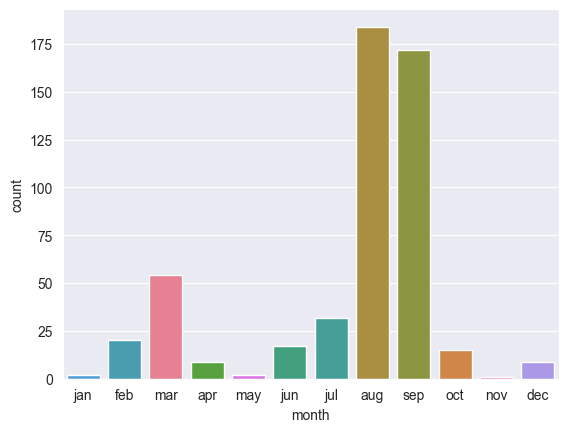

In [299]:
months_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
sns.countplot(data, x="month", order=months_order, hue="month")

Большая часть пожаров приходится на август и сентябрь.

<Axes: xlabel='month', ylabel='temp'>

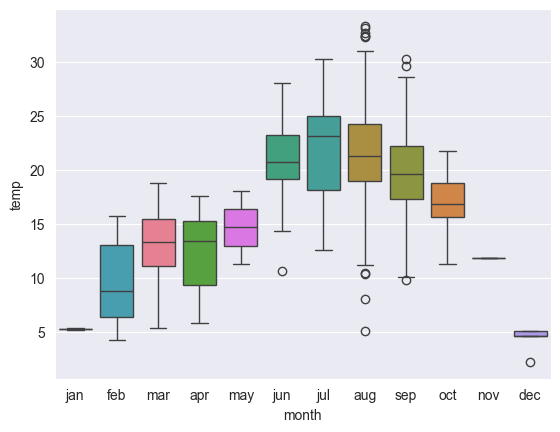

In [300]:
sns.boxplot(data, x="month", y="temp", hue="month", order=months_order)

Наиболее жаркие месяцы - июнь, июль, август и сентябрь.

<Axes: xlabel='month', ylabel='area'>

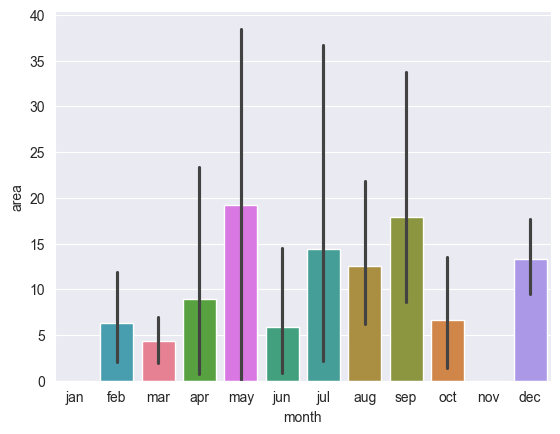

In [301]:
sns.barplot(data, x="month", y="area", order=months_order, hue="month")

Наиболее сильные пожары происходили с мая до сентября.

<Axes: xlabel='month', ylabel='DMC'>

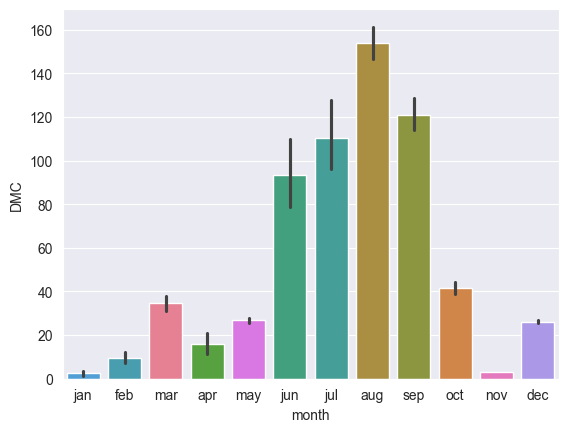

In [302]:
sns.barplot(data, x="month", y="DMC", order=months_order, hue="month")

Месяца с наиболее засушливой почвой - июнь, июль, август и сентябрь.

<Axes: xlabel='area', ylabel='month'>

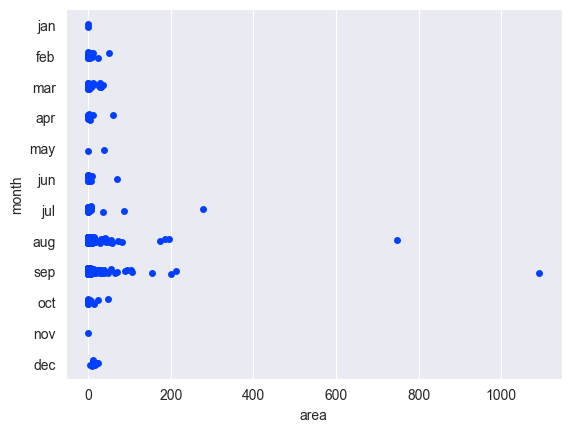

In [303]:
sns.stripplot(data, x="area", y="month", order=months_order)

Особенно сильные пожары возникали в июле, августе и сентябре. Возможно, это связано с высокой степенью засушливости в летний период.

<Axes: xlabel='day', ylabel='count'>

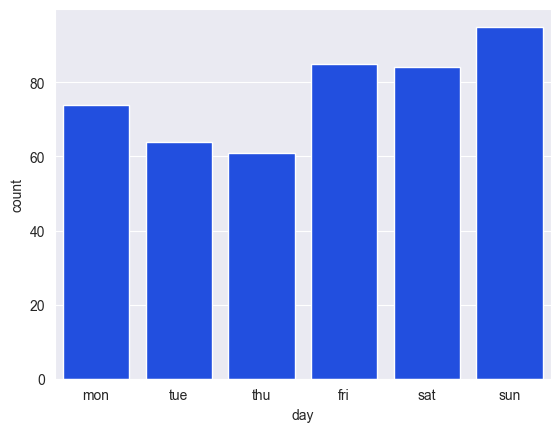

In [304]:
sns.countplot(data, x="day", order=["mon", "tue", "thu", "fri", "sat", "sun"])

Особенно часто пожары возникали в субботу и воскресенье. Возможно, что пожары возникали в связи с высокой степенью посещаемостью парков в выходные.

<Axes: xlabel='area', ylabel='day'>

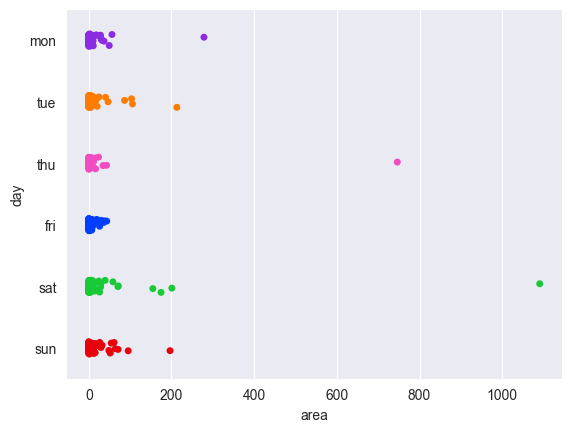

In [305]:
sns.stripplot(data, x="area", y="day", order=["mon", "tue", "thu", "fri", "sat", "sun"], hue="day")

Особенно часто сильные пожары (со сгоревшей площадью примерно 200 и более) возникали в конце недели. Возможно, это связано с высокой посещаемостью парка.


<Axes: xlabel='RH', ylabel='area'>

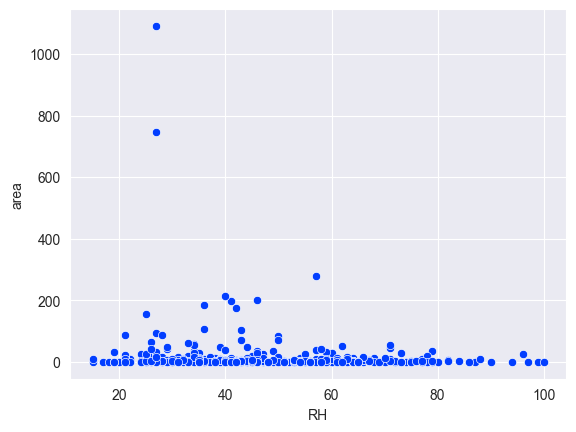

In [306]:
sns.scatterplot(data, x="RH", y="area")

В основном сильные пожары возникали при значениях влажности, меньших 85.

<Axes: xlabel='area', ylabel='wind'>

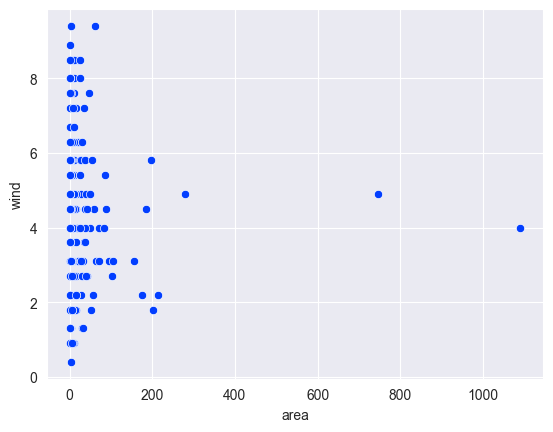

In [307]:
sns.scatterplot(data, x="area", y="wind")

Можно заметить, что более сильныe пожары возникают при более сильном ветре.

<Axes: xlabel='rain', ylabel='area'>

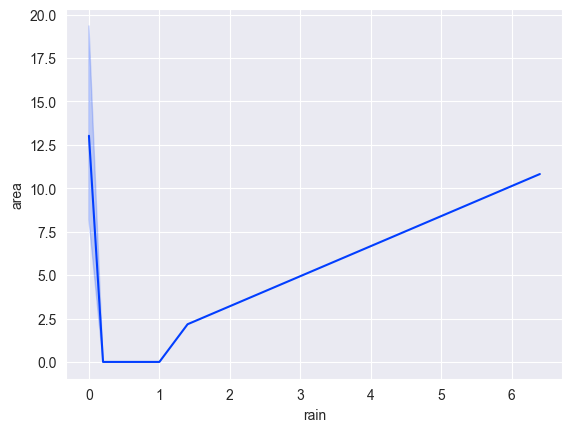

In [308]:
sns.lineplot(data, x="rain", y="area")

Наиболее сильные пожары возникали при наименьшем количестве осадков.

<Axes: xlabel='temp', ylabel='area'>

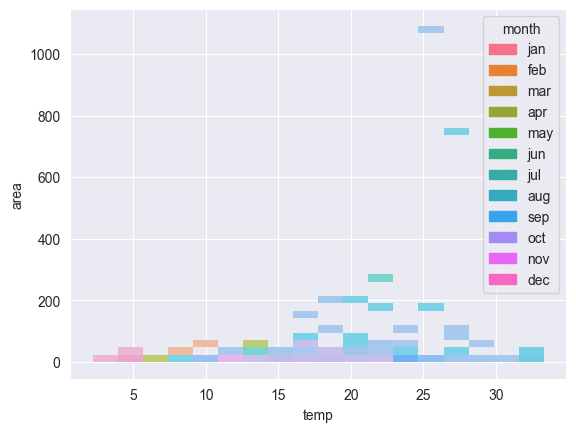

In [309]:
sns.histplot(data, x="temp", y="area", hue="month", hue_order=months_order)

Наиболее сильные пожары возникали в летние месяцы, когда температура выше среднего значения.

### Проанализируем выбросы

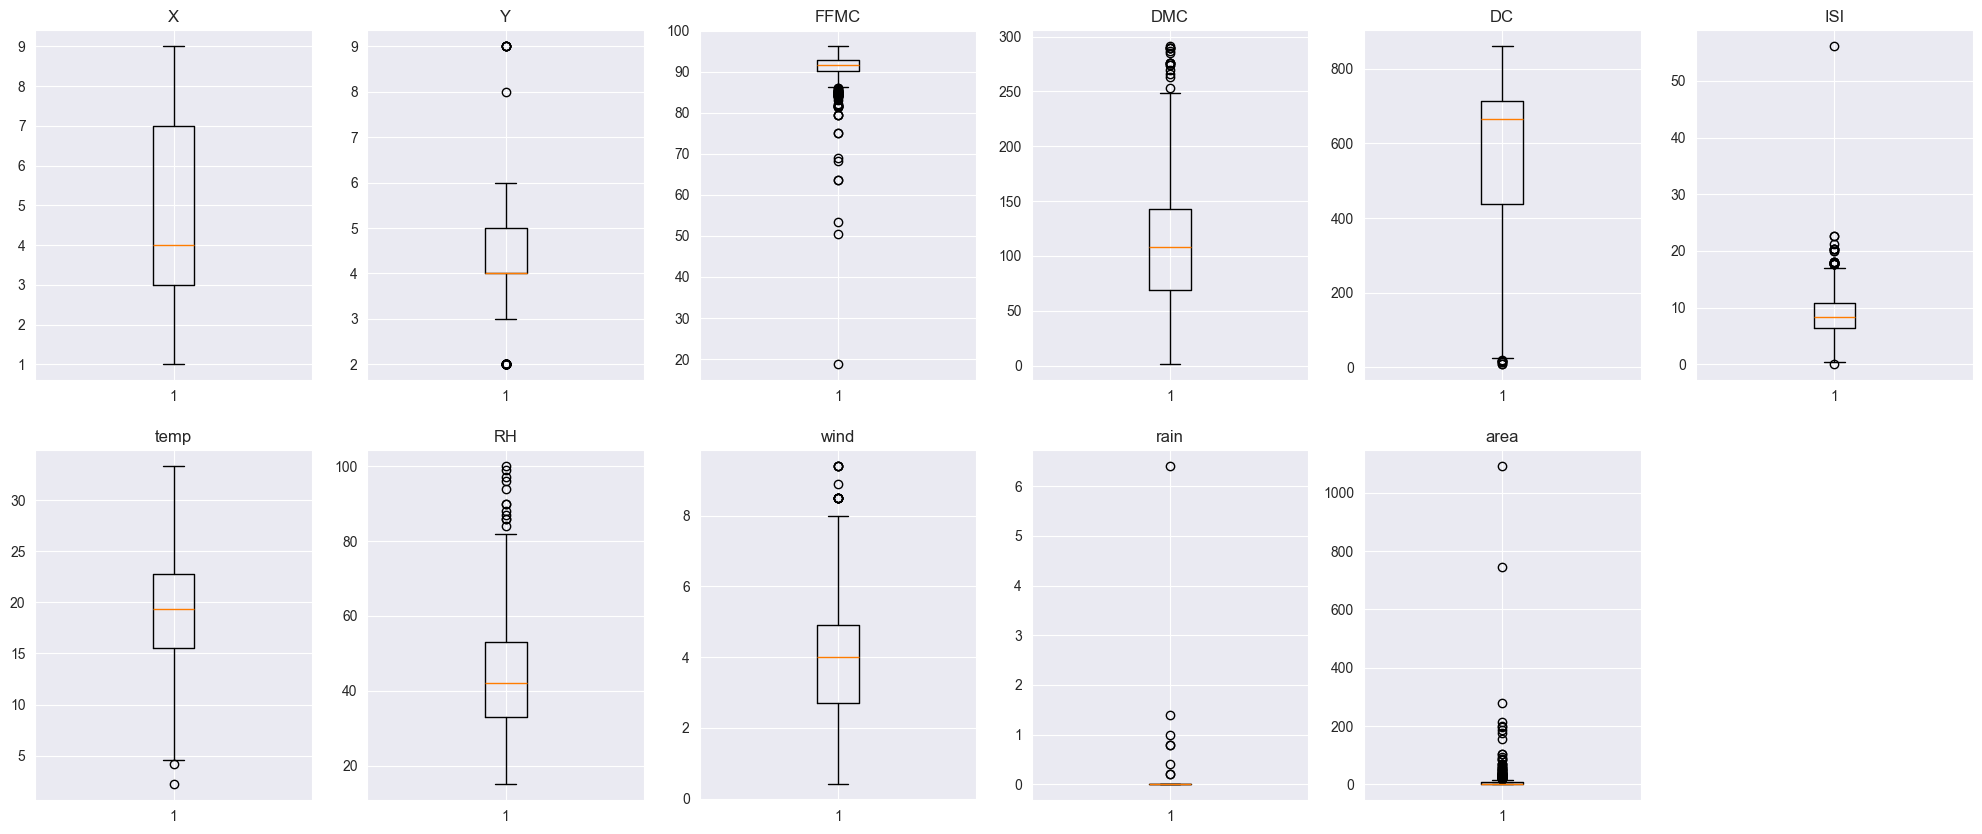

In [310]:
fig, axs = plt.subplots(2, 6, figsize=(25, 10))
ax_flat = axs.flatten()
for i, col_name in enumerate(numeric_columns):
    ax_flat[i].boxplot(data[col_name])
    ax_flat[i].set_title(col_name)
ax_flat[i+1].set_visible(False)

In [311]:
high_area = data[data["area"] > 100]
high_area

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
232,6,4,sep,tue,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39
233,9,4,sep,tue,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
377,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76


Особо сильные пожары происходят при высоком показателе температуры и ветра, а также низком показателе влажности и дождя.

In [312]:
high_area.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000
mean,5.545455,4.363636,91.336364,144.263636,651.172727,8.190909,21.872727,38.181818,3.563636,0.0,313.660909
std,2.841255,1.911687,2.732864,49.565740,79.208195,2.646679,3.504309,9.474367,1.328362,0.0,312.629622
min,1.000000,2.000000,84.400000,73.400000,431.600000,3.200000,17.700000,25.000000,1.800000,0.0,103.390000
25%,3.000000,3.000000,91.000000,121.100000,653.900000,7.000000,18.750000,31.500000,2.450000,0.0,164.755000
50%,6.000000,4.000000,91.700000,129.500000,674.400000,8.400000,21.900000,40.000000,3.100000,0.0,196.480000
75%,8.000000,5.500000,92.500000,166.900000,692.600000,8.600000,24.700000,42.500000,4.700000,0.0,245.705000
max,9.000000,8.000000,94.800000,231.100000,715.100000,13.900000,27.500000,57.000000,5.800000,0.0,1090.840000


В дни, когда площадь пожаров принимает значения, превышающие 100, высокие показатели для скорости ветра и температуры, также нулевые показатели для дождя и влажности, значит, эти значения не являются выбросами.

In [313]:
data[data["rain"] > 0.5]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17


Строка с номером 499 является выбросом, так как велико количество осадков (6.4), а индекс сухости почвы `FFMC` достаточно высокий (96.1).

In [314]:
data.drop(499)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [315]:
low_FFMC = data[data["FFMC"] <= 80]
low_FFMC

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
12,6,5,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
40,4,4,jul,tue,79.5,60.6,366.7,1.5,23.3,37,3.1,0.0,0.00
97,3,4,mar,sat,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,0.00
130,4,6,feb,sat,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00
199,2,4,sep,mon,63.5,70.8,665.3,0.8,22.6,38,3.6,0.0,11.32
299,6,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00
312,2,4,sep,sun,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,0.00
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
463,6,5,feb,tue,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39
464,6,4,feb,tue,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14


Значения для `FFMC` не являются выбросами, так как в соответствующие дни влажность и дожди принимали малые значения, а скорость ветра достаточно высокая, значит, степень влажности почвы была довольно низкой.

In [316]:
hight_dmc = data[data["DMC"] >= 250]
hight_dmc

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
369,4,5,sep,sun,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,0.00
370,7,4,sep,sun,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,11.06
374,6,5,sep,fri,90.3,290.0,855.3,7.4,10.3,78,4.0,0.0,18.30
384,8,4,aug,sat,91.6,273.8,819.1,7.7,21.3,44,4.5,0.0,12.18
392,1,3,sep,sun,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76
406,6,5,sep,sat,87.1,291.3,860.6,4.0,17.0,67,4.9,0.0,3.95
408,4,3,sep,fri,90.3,290.0,855.3,7.4,19.9,44,3.1,0.0,7.80
422,8,6,jul,sun,88.9,263.1,795.9,5.2,29.3,27,3.6,0.0,6.30
430,7,4,sep,thu,89.7,287.2,849.3,6.8,19.4,45,3.6,0.0,0.00
434,1,4,aug,fri,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00


In [317]:
hight_dmc.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000
mean,5.058824,4.411765,90.188235,278.170588,828.970588,7.076471,17.258824,59.705882,4.652941,0.0,8.585882
std,2.561020,0.870260,1.111239,11.054793,25.500680,1.477976,4.738547,16.185505,1.816631,0.0,16.941462
min,1.000000,3.000000,87.100000,253.600000,768.400000,4.000000,10.300000,27.000000,2.700000,0.0,0.000000
25%,4.000000,4.000000,89.700000,273.800000,819.100000,6.800000,14.200000,45.000000,3.600000,0.0,0.000000
50%,6.000000,4.000000,90.300000,276.300000,825.100000,7.100000,16.200000,58.000000,4.000000,0.0,3.710000
75%,7.000000,5.000000,91.000000,290.000000,855.300000,7.400000,19.900000,76.000000,4.900000,0.0,9.960000
max,8.000000,6.000000,91.600000,291.300000,860.600000,10.100000,29.300000,78.000000,8.000000,0.0,70.760000


Значения для высокого `DMC` не являются выбросами, так им соответствуют высокие значения для характеристики ветра и низкие значения влажности и дождя, благоприятствующие высоким значениям для характеристик засушливости верхних слоев почвы.

In [318]:
hight_isi = data[data["ISI"] >= 20]
hight_isi

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
11,7,5,sep,sat,92.8,73.2,713.0,22.6,19.3,38,4.0,0.0,0.00
22,7,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00
24,7,4,aug,sat,93.5,139.4,594.2,20.3,23.7,32,5.8,0.0,0.00
135,3,5,aug,sat,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00
206,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
211,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26.00
266,6,5,aug,tue,94.3,131.7,607.1,22.7,19.4,55,4.0,0.0,0.17
485,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59


In [319]:
hight_isi.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,4.700000,4.000000,93.94000,127.310000,587.140000,24.390000,21.770000,43.500000,5.050000,0.0,9.523000
std,2.311805,0.942809,0.67363,23.220846,144.218771,11.188233,7.428182,20.849993,1.103781,0.0,16.583498
min,2.000000,2.000000,92.80000,73.200000,200.000000,20.000000,5.100000,28.000000,3.600000,0.0,0.000000
25%,2.250000,4.000000,93.50000,132.650000,594.200000,20.300000,19.325000,30.250000,4.125000,0.0,0.000000
50%,5.000000,4.000000,93.90000,139.400000,595.250000,20.300000,21.950000,35.000000,4.900000,0.0,1.060000
75%,7.000000,4.750000,94.45000,139.400000,668.600000,22.275000,27.600000,50.000000,5.800000,0.0,12.105000
max,7.000000,5.000000,95.00000,139.400000,713.000000,56.100000,30.600000,96.000000,7.200000,0.0,49.590000


Данные с высоким `ISI` не являются выбросами, так как в соответствующих данных низкие показатели влажности и количества осадков, высокие показатели скорости ветра и засушливости почвы, а также температуры, что благоприятствует росту интенсивности возгорания.

In [320]:
low_temp = data[data["temp"] <= 5]
low_temp

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
276,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77
280,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27
282,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00
463,6,5,feb,tue,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39
465,2,2,feb,sat,79.5,3.6,15.3,1.8,4.6,59,0.9,0.0,6.84


Данные с низкой температурой не являются выбросами, так как соответствуют холодным месяцам - декабрю и февралю.

In [321]:
high_rh = data[data["RH"] >= 85]
high_rh

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
98,3,4,aug,sun,91.4,142.4,601.4,10.6,11.6,87,4.5,0.0,0.00
211,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26.00
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
299,6,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
335,4,3,sep,mon,91.6,108.4,764.0,6.2,9.8,86,1.8,0.0,0.00
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00


Запись с индексом 7 является выбросом, так как при высокой влажности (86) высокий показатель засушливости верхнего слоя почвы `DMC` (145) и высокий показатель засушливости `FFMC` (91.7).

Запись с индексом 98 также является выбросом, так как при высокой влажности (87) высокий показатель засушливости верхнего слоя почвы `DMC` (142) и высокий показатель засушливости `FFMC` (91.5).

Запись с индексом 211 является выбросом, так как при высокой влажности (96) высокий показатель распространения возгорания (20.3), а также высокие показатели для засушливости почвы (`DMC`, `DC` и `FFMC` равны 594, 139 и 93 соответственно).

Аналогично записи 286, 335 и 451 являются выбросами, так как показатели `RH` достаточно велики, но в то же время показатели засушливости почвы (`DMC`, `DC`, `FFMC`) принимают высокие значения.



In [322]:
data.drop([7, 98, 211, 286, 335, 451])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [323]:
high_wind = data[data["wind"] >= 8]
high_wind

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
162,6,3,mar,sat,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0,1.94
168,6,5,mar,fri,91.2,48.3,97.8,12.5,14.6,26,9.4,0.0,2.53
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
276,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77


Значения для высоких показателей скорости ветра не являются выбросами, так как данным с высоким показателем wind соответствуют пожары с большой площадью возгорания.

### Редактирование данных

In [324]:
data.duplicated().sum()

np.int64(4)

In [325]:
data = data.drop_duplicates()
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Закодируем дни недели и месяцы в соответствии с их порядковым номером.

In [326]:
months_map = {'jan': '1', 'feb': '2', 'mar': '3', 'apr': '4', 'may': '5', 'jun': '6',
        'jul': '7', 'aug': '8', 'sep': '9', 'oct': '10', 'nov': '11', 'dec': '12'}

days_map = {'mon': '1', 'tue': '2', 'wed': '3', 'thu': '4', 'fri': '5', 'sat': '6', 'sun': '7'}

data=data.copy()

data["month"] = data["month"].map(months_map)
data["day"] = data["day"].map(days_map)

data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)

data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Итог

В основном преобладают мелкие пожары с маленькой площадью распространения, крупные пожары с большой областью возгорания редки.

Особенно сильно на показатель сгоревшей площади влияют показатели температуры, влажности, количества осадков, скорости ветра.

Аномальное сильные пожары приходятся на дни с высокой температурой и низким показателем влажности.

В то же время с большим количеством осадков и высокой степенью влажности вероятность пожара уменьшается, а площади распространения возникших пожаров низкие.

На площадь пожара влияет также и время года - в август и сентябрь пожары более вероятны из-за высокой температуры и высокой степени засушливости.

Большее количество пожаров приходится на выходные дни - возможно, что это сопряжено с человеческим фактором.